<a href="https://colab.research.google.com/github/Flor-Si/Trabajos/blob/main/TP9%20-Notebook_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import sklearn

In [ ]:
# Chequeamos nuestra version
sklearn.__version__

'1.6.1'

Ya dijimos previamente que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En la clase anterior, hicimos el analisis exploratorio de los datos y pudimos observar el tipo de datos que teniamos. Pudimos hacernos preguntas y ver algunos patrones.

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [ ]:
# Leemos nuevamente los datos del blackfriday
blackfriday = pd.read_csv('/content/BlackFriday.csv')

In [ ]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
blackfriday.shape

(537577, 12)

#### MANEJO DE DATOS FALTANTES 🚨

Primero, vamos a recordar si tenemos datos faltantes.

In [ ]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


¿Cuanto representa esos valores faltantes?

**¿Que debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información?
- ¿Qué tipo de datos tengo en la columna que voy a imputar?
- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar
- Si es una variable numerica continua, ¿Que distribución tiene?

**¿Como decido que hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes.

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón.

- Estrategias:  
     - **Eliminar los valores**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles.
     - **Eliminación de la variable (columna)**:
         - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: Solo en variables numericas  
        - Sustituir por valor mas frecuente: Util para variables categoricas
        - Algoritmo de ML: K-NN (k-nearest neighboors)

A) Si optamos por eliminar los datos, puedemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
blackfriday_drop = blackfriday.dropna()

In [ ]:
blackfriday_drop.shape

(164278, 12)

In [ ]:
blackfriday.dropna(how='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
blackfriday.dropna(subset=['Gender'])#elimina los nulos solo de la columna que cito

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [ ]:
blackfriday.dropna(subset=['Age', 'Gender']) #saca los nulos de esas dos columnas en este caso no tengo nulo en ninguna de las dos

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


B) Si optamos por imputar los datos, podemos hacerlo usando la siguiente función:
    
`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica como son representados los valores faltantes (np.nan es el estandard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [ ]:
from sklearn.impute import SimpleImputer

**Variable: `City_Category`**

<ipython-input-17-30b94a7a165c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday, palette="Set3")


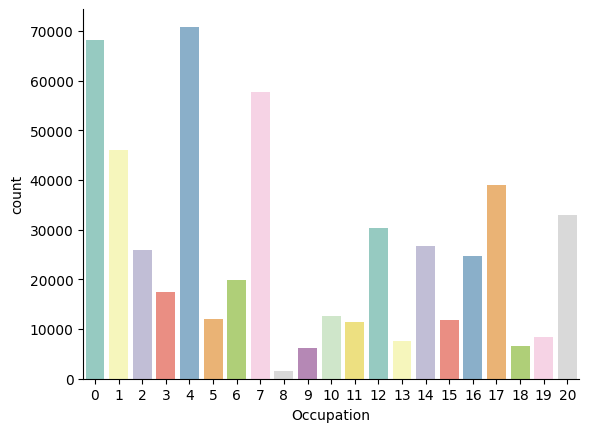

In [ ]:
sns.countplot(x="Occupation", data=blackfriday, palette="Set3")
sns.despine()

In [ ]:
blackfriday['Occupation'].value_counts()#acá muestro los valores más frecuentes y los cuentas que son el "4"

,count
Occupation,
4,70862
0,68120
7,57806
1,45971
17,39090
20,32910
12,30423
14,26712
2,25845


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")#Acá con la funcion missing _value =que son los valores faltante los voy a reemplazar por los valores más fecuente

In [ ]:
blackfriday_imputados = imputer.fit_transform(blackfriday[['Occupation']])#Fit transform que calcule los valores imputados en ocupacion

In [ ]:
np.shape(blackfriday_imputados)

(537577, 1)

In [ ]:
blackfriday_imputados[:10]#Deja los valores origunales y donde hay un NaN lo reemplaza por el valor más frecuente que es 4

array([[10],
       [10],
       [10],
       [10],
       [16],
       [15],
       [ 7],
       [ 7],
       [ 7],
       [20]])

In [ ]:
blackfriday["Occupation"] = blackfriday_imputados#a Ahora reemplazo en la columna Ocupacion por el data fream de BF Imputados

In [ ]:
blackfriday.head() #Y leemos el nuevo DF

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
blackfriday['Occupation'].value_counts()#Cuenta los nuevos valores

,count
Occupation,
4,70862
0,68120
7,57806
1,45971
17,39090
20,32910
12,30423
14,26712
2,25845


**Variable: `Age`**

In [ ]:
blackfriday['Age'].describe() #Me describe solo la variable EDAD  1° lo cuenta la cantidad, 2° cuantos valores unicos, 3° donde este el maximo, 4° con que frecuencia sale  (Y tengo datos tipo TEXTO y sin TIPO RANGO)

,Age
count,537577
unique,7
top,26-35
freq,214690


In [ ]:
imputer_age = SimpleImputer(missing_values=np.nan, strategy="mean")# busco la media


In [ ]:
# Convertir la columna 'Age' de string a entero
# Ver el tipo de dato de una columna específica
print(blackfriday['Age'].dtype)#Object me indica que es tipo texto los valores

object


In [ ]:
blackfriday['Age'].describe()

,Age
count,537577
unique,7
top,26-35
freq,214690


**Variable: `Gender`**

In [ ]:
blackfriday['Gender'].value_counts()#Acá lo que hace es reemplazar por ejemplo por casa 10 M es 1 F

,count
Gender,
M,405380
F,132197


In [ ]:
imputer_gen = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
blackfriday['Gender'] = imputer_gen.fit_transform(blackfriday[['Gender']])

ValueError: 2

In [ ]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


**Variable `Purchase`**

In [ ]:
blackfriday.dropna(subset=['Purchase'], inplace=True) #Con la varibale INPLACE directamente lo que hace es reemplaza los nulos o vacios.
#OJO con INPLACE porque podemos eliminar muchos datos del Data Frame original

In [ ]:
blackfriday.shape

(537577, 12)

**Columnas `Product_Category_2` and `Product_Category_3`**

In [ ]:
blackfriday.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)#OJO con INPLACE porque podemos eliminar muchos datos del Data Frame original elimono todos los null de las categoria 2 y 3


In [ ]:
blackfriday.isna().sum()# imprimo vemos que no tenemos más nulos

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Purchase,0


#### DETECCION DE OUTLIERS

- Manera de detectar outliers:
    - z-score
        - Considera que todo valor que se aleje mucho de la media=0 es un outlier.
        - Depende de la media y el desvio estandard para medir la centralidad y dispersión, los cuales son muy afectados por outliers. Si las variables no tiene una distribución normal, termino removiendo muchos outliers del dataset.
        - No funciona bien en dataset muy pequeños.
    - Rango Intercuartil:
        - Es robusto y no es tan sensible a outliers.

In [ ]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Purchase,int64


sns.displot(blackfriday['Purchase'])# Con Displot vemos como se comporta la variable  "compras"
sns.despine()

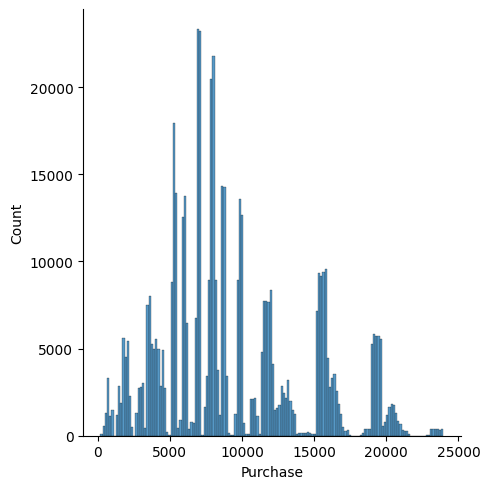

In [ ]:
sns.displot(blackfriday['Purchase'])
sns.despine()

In [ ]:
z = stats.zscore(np.array(bf['Purchase']))

In [ ]:
threshold = 2.0

In [ ]:
z_index = blackfriday['Purchase'][np.abs(z) < threshold].index#Este nos indica los mayores de nuestro valor limite de 2 o 2.5 y ver los outlaiers

blackfriday_withzscore = blackfriday.loc[z_index]

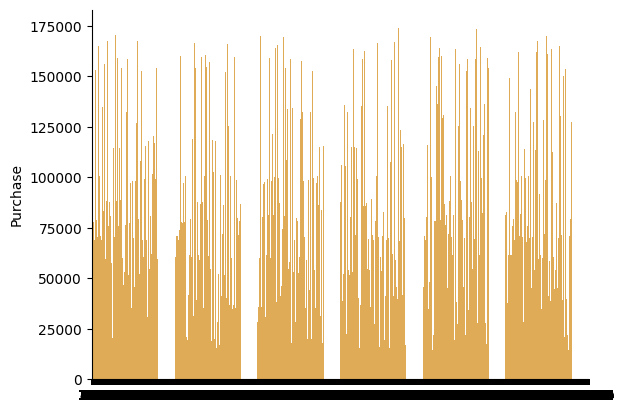

In [ ]:
sns.barplot(blackfriday_withzscore['Purchase'], color='#F5B041')# Con barplot nos indica las comparaciones en una categoria
sns.despine()

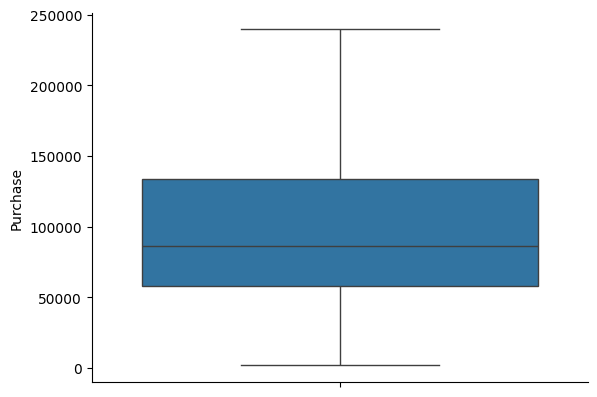

In [ ]:
sns.boxplot(bf['Purchase'])
sns.despine()

In [ ]:
q1 = bf['Purchase'].quantile(0.25)
q3 = bf['Purchase'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
bf = bf[(bf['Purchase'] > lb) & (bf['Purchase'] < ub)]

In [ ]:
bf.reset_index(drop=True, inplace=True)

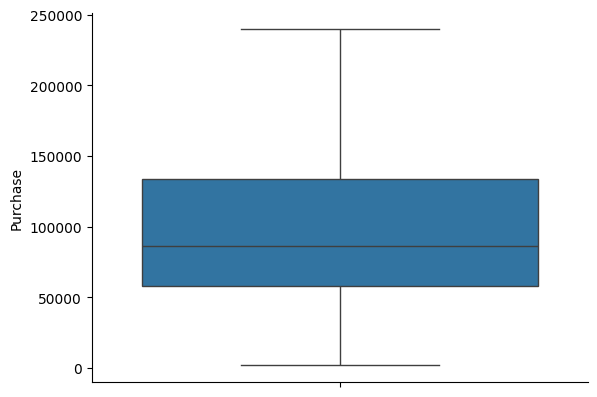

In [ ]:
sns.boxplot(bf['Purchase'])
sns.despine()

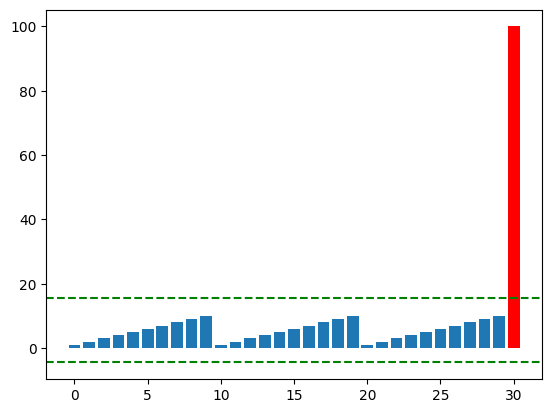

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
datos = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100])

# Calcular cuartiles
Q1 = np.percentile(datos, 25)
Q3 = np.percentile(datos, 75)

# Calcular rango intercuartílico
IQR = Q3 - Q1

# Calcular umbral
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Detectar outliers
outliers = datos[(datos < umbral_inferior) | (datos > umbral_superior)]

# Crear gráfico de barras
plt.bar(range(len(datos)), datos)

# Resaltar outliers
outlier_indices = np.where((datos < umbral_inferior) | (datos > umbral_superior))[0]
plt.bar(outlier_indices, datos[outlier_indices], color='red')

# Agregar líneas de umbral
plt.axhline(y=umbral_inferior, color='green', linestyle='--')
plt.axhline(y=umbral_superior, color='green', linestyle='--')

plt.show()

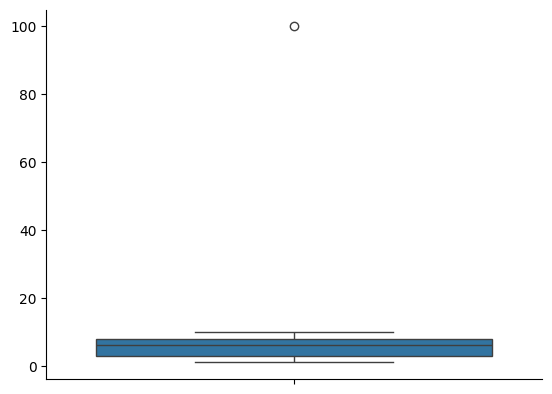

In [ ]:
import seaborn as sns

# Cargar datos
sns.boxplot(datos)
sns.despine()